## Lógica usada neste trabalho
Para este trabalho, foi fornecido dois datasets:
- amazon_prime_titles.csv
- netflix_titles.csv

O objetivo é executar alguns filtros requisitados na introdução do "Data Challenge". Realizei alguns tratamentos de dados iniciais como a adição de sufixo no id de cada titulo visando diferenciar a origem dos dados após a junção dos dois datasets.

Embora apresentasse muitas "missing values", não houve a necessidade de se excluir as linhas com NaN ou fazer outro qualquer tratamento de preencheminto, visto que o objetivo final não é executar nenhum modelo preditivo.


### Fluxo:
1. Instalação das Principais Bibliotecas
2. Carregando os dois arquivos
3. Mesclando os dois Arquivos
4. Análise Exploratório dos dados com tratamento de nulos
5. Filtrando os dados visando responder as perguntas do desafio


## Instalar as principais bibliotecas

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

import re
import calendar

In [98]:
%%capture
!pip install -U pandasql
!pip install pydbgen 
from pandasql import sqldf

## Carregar os dois arquivos

In [99]:
df_amazon = pd.read_csv('/content/amazon_prime_titles.csv')
df_amazon.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [100]:
df_netflix = pd.read_csv('/content/netflix_titles.csv')
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [101]:
print("O dataset df_netflix contém " + str(df_netflix.shape[0]) + 
      " linhas and " + str(df_netflix.shape[1]) + " colunas.")
print("O dataset df_amazon contém " + str(df_amazon.shape[0]) + 
      " linhas and " + str(df_amazon.shape[1]) + " colunas.")

O dataset df_netflix contém 8807 linhas and 12 colunas.
O dataset df_amazon contém 9668 linhas and 12 colunas.


***Pré-conclusão:*** ambos os datasets possuem a mesma quantidade de colunas e mesmos nomes, facilitanto a fusão e a manipulação dos dados

## Mesclando os dois arquivos

Após a análise dos valores das colunas, nota-se que não há nenhuma classificação específica quanto à plataforma de cada conteúdo. Portanto, irei adicionar um sufixo a cada id, na coluna show_id, assim criando uma referencia da plataforma de origem.

A função abaixo concatena o sufixo à "string" e em seguida o método apply( ), obtem-se o resultado esperado:

In [102]:
def add_suffix(text):
  return text + '_amazon'

df_amazon['show_id'] = df_amazon['show_id'].apply(add_suffix)

df_amazon.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1_amazon,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2_amazon,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3_amazon,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4_amazon,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5_amazon,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [103]:
def add_suffix(text):
  return text + '_netflix'

df_netflix['show_id'] = df_netflix['show_id'].apply(add_suffix)

df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1_netflix,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2_netflix,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3_netflix,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4_netflix,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5_netflix,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [104]:
df = pd.concat([df_amazon, df_netflix])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1_amazon,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2_amazon,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3_amazon,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4_amazon,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5_amazon,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [105]:
print("Após a concatenação, o novo dataframe contém " + str(df.shape[0]) + 
      " linhas and " + str(df.shape[1]) + " colunas.")

Após a concatenação, o novo dataframe contém 18475 linhas and 12 colunas.


## Análise Exploratória dos Dados

Outro grande desafio quando fazemos a análise de dados é trabalhar com os valores faltantes, os chamados ***missing values***. 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18475 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       18475 non-null  object
 1   type          18475 non-null  object
 2   title         18475 non-null  object
 3   director      13759 non-null  object
 4   cast          16417 non-null  object
 5   country       8648 non-null   object
 6   date_added    8952 non-null   object
 7   release_year  18475 non-null  int64 
 8   rating        18134 non-null  object
 9   duration      18472 non-null  object
 10  listed_in     18475 non-null  object
 11  description   18475 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB



Calculando a porcentagem das colunas com valores nulos:

In [107]:
percent_missing = df.isna().sum()/df.shape[0] * 100
percent_missing = percent_missing.apply(lambda x: f"{x:.2f}%")
percent_missing = percent_missing.sort_values(ascending=False)
print(percent_missing)

country         53.19%
date_added      51.55%
director        25.53%
cast            11.14%
rating           1.85%
duration         0.02%
show_id          0.00%
type             0.00%
title            0.00%
release_year     0.00%
listed_in        0.00%
description      0.00%
dtype: object


Verificando se alguns dos dados nulos estão sob o mesmo ‘title’ em outras linhas e dessa maneira tentarei preencher alguns dados nulos:

In [108]:
titles = df['title'].unique()
print (str(len(titles))+' diferentes títulos no dataset')

18086 diferentes títulos no dataset


In [109]:
contagem_titles = df['title'].value_counts()
contagem_titles

Don                                          2
USS Indianapolis: Men of Courage             2
Joker                                        2
Labyrinth                                    2
Red                                          2
                                            ..
Paradise Isle                                1
Learning Animals with Johny - LooLoo Kids    1
Irrefutable Proof                            1
Gulliver's Travels                           1
Zubaan                                       1
Name: title, Length: 18086, dtype: int64

Analisamos o primeiro filme do output anterior, como exemplo:

In [110]:
Don = df.loc[df['title']=='Don']
Don.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5289,s5290_amazon,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Isha Koppikar...",NaN,NaN,2006,NR,169 min,"Action, Drama, International",This action-thriller is a remake of the well-k...
3133,s3134_netflix,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Arjun Rampal,...",India,"December 15, 2019",2006,TV-14,169 min,"Action & Adventure, International Movies",A ruthless crime boss and drug lord is nabbed ...


Nota-se que valores da coluna 'country' e 'date_added' do titulo da Amazon estão nulos. Nesse caso, a variável 'country' tem por caracteristica a independencia da plataforma que o titulo esta sendo exibido, o que não é o mesmo para a variável 'date_added'. 

Assim, podemos copiar os mesmos valores da outra plataforma Netflix. Para isso, é criada uma função que preenche os valores faltantes para variáveis independentes de plataforma e cria exceção para as dependentes "date_added", 'rating'.

In [113]:
def fill_missing_values(df, col_conditional):
  for idx, row in df.iterrows():
    if row.isna().any():
      matches = df[df[col_conditional] == row[col_conditional]]
      modes = matches.dropna().mode()
      if not modes.empty:
        modes = modes.iloc[0]
        for col in df.columns:
          if col not in ["date_added", "rating"] and pd.isna(row[col]):
            col_idx = df.columns.get_loc(col)
            df.loc[idx, col] = modes[col_idx]
  return df

A coluna condicional de referencia é o título do conteúdo:

In [114]:
fill_missing_values(df, 'title')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1_amazon,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2_amazon,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3_amazon,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4_amazon,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5_amazon,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803_netflix,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804_netflix,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805_netflix,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806_netflix,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [115]:
percent_missing = df.isna().sum()/df.shape[0] * 100
percent_missing = percent_missing.apply(lambda x: f"{x:.2f}%")
percent_missing = percent_missing.sort_values(ascending=False)
print(percent_missing)

country         51.77%
date_added      51.55%
director        25.39%
cast            11.12%
rating           1.85%
duration         0.02%
show_id          0.00%
type             0.00%
title            0.00%
release_year     0.00%
listed_in        0.00%
description      0.00%
dtype: object


Notamos uma redução pequena na taxa de nulos, porém importante como é verificado a seguir após o tratamento:

In [116]:
Don_filled = df.loc[df['title']=='Don']
Don_filled.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5289,s5290_amazon,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Isha Koppikar...",India,NaN,2006,NR,169 min,"Action, Drama, International",This action-thriller is a remake of the well-k...
3133,s3134_netflix,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Arjun Rampal,...",India,"December 15, 2019",2006,TV-14,169 min,"Action & Adventure, International Movies",A ruthless crime boss and drug lord is nabbed ...


## Filtrando os Dados

### 1- Top 10 atores/atrizes considerando todos os dados

Para a resposta desta questão, aplicarei o seguinte método:

- Divisão dos valores da coluna 'cast' para criar uma lista de nomes, usando ',' como separador
- Em seguida, contamos a ocorrência de cada nome, removendo os espaços em branco
- Usamos a função sorted para coletar os Top 10 atores/atrizes

In [117]:
nomes = []
for value in df['cast']:
  if isinstance(value, str):
    nomes.extend(value.split(','))

nomes_counts = {}
for n in nomes:
  n = n.strip() 
  if n in nomes_counts:
    nomes_counts[n] += 1
  else:
    nomes_counts[n] = 1

top_nomes = sorted(nomes_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Os Top 10 atores/atrizes dos dados são:")
for nome, count in top_nomes:
    print(nome, "-", count)

Os Top 10 atores/atrizes dos dados são:
Anupam Kher - 59
Maggie Binkley - 56
Amitabh Bachchan - 47
Shah Rukh Khan - 46
Nassar - 43
Akshay Kumar - 41
Paresh Rawal - 39
Danny Trejo - 39
Naseeruddin Shah - 39
Nicolas Cage - 35


No entanto, esse código ignorou o fato que alguns filmes aparecem duas vezes no dataset. Assim, os filmes que aparecem duas vezes terão uma versão 'dropada' a e o código rodado novamente:

In [118]:
duplicates_dropped = df.drop_duplicates(subset='title', keep='first')

nomes = []
for value in duplicates_dropped['cast']:
  if isinstance(value, str):
    nomes.extend(value.split(','))

nomes_counts = {}
for n in nomes:
  n = n.strip() 
  if n in nomes_counts:
    nomes_counts[n] += 1
  else:
    nomes_counts[n] = 1

top_nomes = sorted(nomes_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 atores/atrizes dos dados, sem os filmes duplicados, são:")
for nome, count in top_nomes:
    print(nome, "-", count)

Top 10 atores/atrizes dos dados, sem os filmes duplicados, são:
Maggie Binkley - 56
Anupam Kher - 55
Amitabh Bachchan - 43
Nassar - 43
Shah Rukh Khan - 40
Naseeruddin Shah - 39
Paresh Rawal - 38
Danny Trejo - 38
Akshay Kumar - 38
1 - 35


### 2- Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas

Usando SQL queries, os dados serão divididos em 'new_dataset_amazon' e 'new_dataset_netflix' para comparar as duas plataformas

In [119]:
query_amazon = '''
SELECT *, show_id || '_amazon'
FROM df
WHERE show_id LIKE '%amazon%'
'''

query_netflix = '''
SELECT *, show_id || '_netflix'
FROM df
WHERE show_id LIKE '%netflix%'
'''
new_dataset_amazon = sqldf(query_amazon, locals())
new_dataset_netflix = sqldf(query_netflix, locals())

In [120]:
new_dataset_amazon.shape

(9668, 13)

In [121]:
new_dataset_netflix.shape

(8807, 13)

Agora, coletamos os Top 5 países produtores de conteúdos nos dados gerais e depois por plataforma:

In [122]:
top_produtores_geral = df['country'].value_counts()[:5]

print("Os Top 5 países produtores de conteúdos nos dados gerais são:")
print(top_produtores_geral)

Os Top 5 países produtores de conteúdos nos dados gerais são:
United States     3212
India             1236
United Kingdom     453
Japan              247
Canada             202
Name: country, dtype: int64


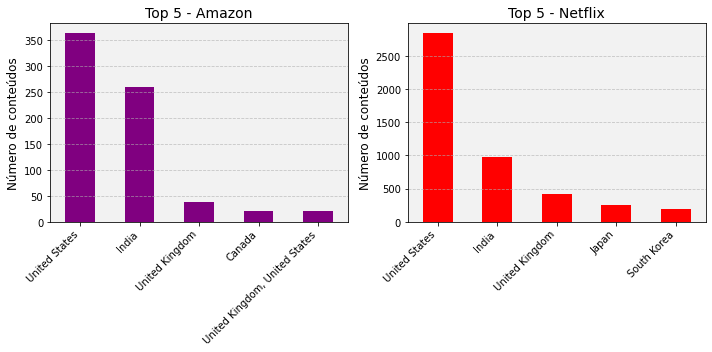

In [123]:
top_produtores_amazon = new_dataset_amazon['country'].value_counts()[:5]
top_produtores_netflix = new_dataset_netflix['country'].value_counts()[:5]

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

top_produtores_amazon.plot(kind='bar', ax=axs[0], color='purple')
axs[0].set_title('Top 5 - Amazon', fontsize=14)
axs[0].set_xlabel('', fontsize=12)
axs[0].set_ylabel('Número de conteúdos', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_facecolor('#F2F2F2')

top_produtores_netflix.plot(kind='bar', ax=axs[1], color='red')
axs[1].set_title('Top 5 - Netflix', fontsize=14)
axs[1].set_xlabel('', fontsize=12)
axs[1].set_ylabel('Número de conteúdos', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_facecolor('#F2F2F2')

plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

###3- Mês no qual há mais adições de filmes na plataforma Netflix

Para manipular os valores contendo datas, primeiramente converte-se a coluna 'date_added' para um formato regular de data. Em seguida, extrai-se o mês e cria-se uma nova coluna com cada valor 'mês'. Fazemos a contagem de frequência e selecionamos o primeiro valor. No entanto, como a coluna apresentava muitos nulos, precisei fazer alguns tratamentos:

In [124]:
new_dataset_netflix['date_added'] = new_dataset_netflix['date_added'].str.strip()

try:
    new_dataset_netflix['date_added'] = pd.to_datetime(new_dataset_netflix['date_added'], format='%B %d, %Y', errors='raise')
except ValueError as e:
    print("Error converting date_added column:", e)
    exit()

new_dataset_netflix['month'] = new_dataset_netflix['date_added'].dt.month

freq = new_dataset_netflix['month'].value_counts()
if not freq.empty:
    mes_mais_ad = freq.index[0]
    mes_mais_ad_nome = calendar.month_name[int(mes_mais_ad)]
    print("Mês no qual há mais adições de filmes na plataforma Netflix:", mes_mais_ad_nome)
else:
    print("Não há datas válidas na coluna date_added.")

Mês no qual há mais adições de filmes na plataforma Netflix: July


###4- Quantidade de filmes listados como comédia

Para esta questão, aplicarei dois filtros:
- o primeiro para selecionar todos os titulos contendo 'Comedies' ou 'Comedy' nos valores da coluna listed_in
- e outro para obter apenas os filmes, excluindo 'TV Show'

In [125]:
filtro_comedia = df['listed_in'].str.contains('Comedies|Comedy', na=False)
comedia_dataset = df.loc[filtro_comedia]

filtro_filme = comedia_dataset['type'].str.contains('Movie', na=False)
filme_comedia_dataset = comedia_dataset.loc[filtro_filme]

print("A quantidade de filmes listados como comédia nas duas plataformas é:", len(filme_comedia_dataset))

A quantidade de filmes listados como comédia nas duas plataformas é: 3838


###5- Lista de todos os gêneros de filmes

Aqui utilizo o mesmo princípio do código usado na resposta da questão 1. Extrai todo o texto separado por vírgula e realizo a coleta de todos os termos que aparecem na coluna pelo menos uma vez. Além disso, removo a palavra "Movies" de alguns elementos, substituo "and" por "&" e removo "and" do inicio da palavra "Culture"

In [ ]:
filtro_filme_2 = df['type'].str.contains('Movie', na=False)
filme_dataset = df.loc[filtro_filme_2]

generos = []
for value in filme_dataset['listed_in']:
    if isinstance(value, str):
        generos.extend(value.split(','))

todos_generos = list(set(generos))
todos_generos = [element.strip().replace('Movies', '') for element in todos_generos]
todos_generos = [element.replace(' and ', ' & ') for element in todos_generos]
todos_generos = sorted(todos_generos)
todos_generos = [element.replace('and', '').strip() for element in todos_generos]
todos_generos = list(set(todos_generos))
todos_generos.sort()

print("A lista de todos os gêneros de filmes contém:", len(todos_generos))
for element in todos_generos:
    print(element)

Mesmo assim, muitos generos ainda parecem semelhantes e precisariam de alguma técnica mais profunda de NPL, como a lemmatização ou stemming.

###6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas

Seguindo o mesmo princípio da questão 2, executo a coleta da frequência de "TV Show" nos dados gerais e depois por plataforma:

In [ ]:
filtro_tv_show = df['type'].str.contains('TV Show', na=False)
tv_show_dataset = df.loc[filtro_tv_show]

filtro_tv_show_amazon = new_dataset_amazon['type'].str.contains('TV Show', na=False)
tv_show_amazon = new_dataset_amazon.loc[filtro_tv_show_amazon]

filtro_tv_show_netflix = new_dataset_netflix['type'].str.contains('TV Show', na=False)
tv_show_netflix = new_dataset_netflix.loc[filtro_tv_show_netflix]


data = {
    'Dados': ['Amazon', 'Netflix', 'Gerais'],
    'Frequência': [len(tv_show_amazon), len(tv_show_netflix), len(tv_show_dataset)]
}

comparativo = pd.DataFrame(data)

comparativo

###7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas

Agora para a frequência de "TV Show" nos dados gerais e depois por plataforma:

In [ ]:
filtro_movies = df['type'].str.contains('Movie', na=False)
movies_dataset = df.loc[filtro_movies]

filtro_movies_amazon = new_dataset_amazon['type'].str.contains('Movie', na=False)
movies_amazon = new_dataset_amazon.loc[filtro_movies_amazon]

filtro_movies_netflix = new_dataset_netflix['type'].str.contains('Movie', na=False)
movies_netflix = new_dataset_netflix.loc[filtro_movies_netflix]


data = {
    'Dados': ['Amazon', 'Netflix', 'Gerais'],
    'Frequência': [len(movies_amazon), len(movies_netflix), len(movies_dataset)],
}

comparativo = pd.DataFrame(data)

comparativo

In [ ]:
data = {
    'Dados': ['Movies', 'TVShow', 'Gerais'],
    'Amazon': [len(movies_amazon), len(tv_show_amazon), len(new_dataset_amazon)],
    'Netflix': [len(movies_netflix), len(tv_show_netflix), len(new_dataset_netflix)]
}

comparativo = pd.DataFrame(data)

comparativo = comparativo.set_index('Dados')
comparativo

No demonstarttivo acima, nota-se que o tipo de conteudo "Movies" possui maior numero se comparados com "TV Show". A plataforma Netflix possui uma proporção menor em relação à Amazon.